<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/Acidentes_Rodovias_Federais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=8 color=purple face=timesnewroman><b><i>Análise de Acidentes de Trânsito nas Rodovias Federais no Brasil</i></b>

<font color=red size=5>OBS.: Análise em construção!!

In [228]:
print("OBS.: EM CONSTRUÇÃO!!")

OBS.: EM CONSTRUÇÃO!!


In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [230]:
df_07 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2007.csv", sep=';', encoding='latin-1')
df_08 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2008.csv", sep=';', encoding='latin-1')
df_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2009.csv", sep=';', encoding='latin-1')
df_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2010.csv", sep=';', encoding='latin-1')
df_11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2011.csv", sep=';', encoding='latin-1')
df_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2012.csv", sep=';', encoding='latin-1')
df_13 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2013.csv", sep=';', encoding='latin-1')
df_14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2014.csv", sep=';', encoding='latin-1')
df_15 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2015.csv", sep=';', encoding='latin-1')
df_16 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2016.csv", sep=';', encoding='latin-1')
df_17 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2017.csv", sep=';', encoding='latin-1')
df_18 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2018.csv", sep=';', encoding='latin-1')
df_19 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2019.csv", sep=';', encoding='latin-1')
df_20 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2020.csv", sep=';', encoding='latin-1')

df = df_20.append(df_19.append(df_18.append(df_17.append(df_16.append(df_15.append(df_14.append(df_13.append(df_12.append(df_11.append(df_10.append(df_09.append(df_08.append(df_07)))))))))))))

In [231]:
dataset = df.copy()

In [232]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804078 entries, 0 to 127674
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   data_inversa            object 
 2   dia_semana              object 
 3   horario                 object 
 4   uf                      object 
 5   br                      object 
 6   km                      object 
 7   municipio               object 
 8   causa_acidente          object 
 9   tipo_acidente           object 
 10  classificacao_acidente  object 
 11  fase_dia                object 
 12  sentido_via             object 
 13  condicao_metereologica  object 
 14  tipo_pista              object 
 15  tracado_via             object 
 16  uso_solo                object 
 17  pessoas                 int64  
 18  mortos                  int64  
 19  feridos_leves           int64  
 20  feridos_graves          int64  
 21  ilesos                  int64  


In [233]:
dataset.nunique()

id                        1729468
data_inversa                 4839
dia_semana                     14
horario                      1486
uf                             28
br                            322
km                          27871
municipio                    4076
causa_acidente                 56
tipo_acidente                  42
classificacao_acidente          5
fase_dia                       10
sentido_via                     6
condicao_metereologica         24
tipo_pista                      7
tracado_via                    22
uso_solo                        7
pessoas                        81
mortos                         20
feridos_leves                  52
feridos_graves                 39
ilesos                         67
ignorados                      48
feridos                        60
veiculos                       21
latitude                   166850
longitude                  167320
regional                       55
delegacia                     359
uop           

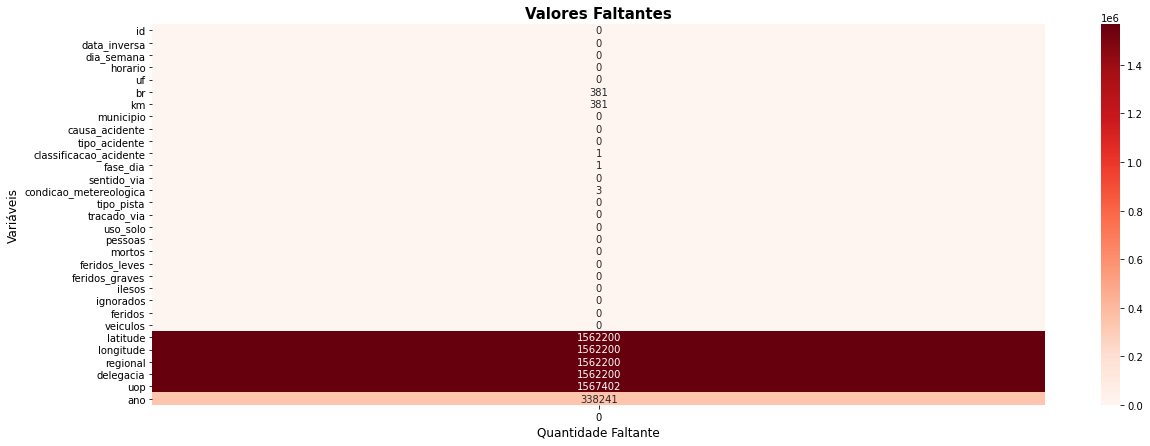

In [234]:
plt.figure(figsize=(20,7))
plt.title('Valores Faltantes',fontweight='bold', fontsize=15)
ax = sns.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='Reds')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade Faltante', fontsize=12)
plt.show()

<font color=darkred size=4>Há muitos valores faltantes para as variáveis:
- latitude, longitude, regional, delegacia,uop e ano.

<font color=darkred size=4>Quais perguntas eu quero responder a priori?
- Qual a quantidade de acidentes em rodovias federais por ano no Brasil?
- Os acidentes estão diminuindo ou aumentando?
- As mortes en acidentes de trânsito estão diminuindo ou aumentando?
- Quais as maiores causas de cidente de trânsito, por ano e por tipo?
- O dia da semana tem relação com os acidentes?
- Quais os estados/regiões que mais causam acidentes?

...

In [235]:
dataset.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ,NaN
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC,NaN
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,1,0,0,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO,NaN
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153,360,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR,NaN


Quantidade de Acidentes em Rodovias Federais no Brasil por ano

In [265]:
dataset.data_inversa = pd.to_datetime(dataset.data_inversa)
dataset["Ano"] = dataset.data_inversa.dt.year
dataset["Mes"] = dataset.data_inversa.dt.month
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804078 entries, 0 to 127674
Data columns (total 34 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      float64       
 1   data_inversa            datetime64[ns]
 2   dia_semana              object        
 3   horario                 object        
 4   uf                      object        
 5   br                      object        
 6   km                      object        
 7   municipio               object        
 8   causa_acidente          object        
 9   tipo_acidente           object        
 10  classificacao_acidente  object        
 11  fase_dia                object        
 12  sentido_via             object        
 13  condicao_metereologica  object        
 14  tipo_pista              object        
 15  tracado_via             object        
 16  uso_solo                object        
 17  pessoas                 int64         
 18  mor

In [272]:
print("Quantidade de Acidentes por Ano nas Rodovias Federais:\n")
acidentes = dataset.groupby(["Ano"])[["id"]].count()
acidentes.columns.name = "Acidentes"
acidentes.T

Quantidade de Acidentes por Ano nas Rodovias Federais:



Ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Acidentes,,,,,,,,,,,,,,
id,127675,141043,158646,183469,192326,184568,186748,169201,122161,96363,89518,69206,67446,15708


In [273]:
acidentes["Acumulado"] = [acidentes.id[:i+1].sum() for i in range(acidentes.shape[0])]
acidentes["Media_Movel"] = [round(acidentes.id[:i+1].mean()) for i in range(acidentes.shape[0])]
acidentes.rename(columns={"id":"Qtd"}, inplace=True)

acidentes["Relativo_ano_anterior_(%)"] = acidentes.Qtd
for i in range(acidentes.shape[0]):
  if i == 0: acidentes["Relativo_ano_anterior_(%)"].iloc[i] = 1
  else: acidentes["Relativo_ano_anterior_(%)"].iloc[i] = round((acidentes["Qtd"].iloc[i]/acidentes["Qtd"].iloc[i-1])-1,4)*100
acidentes.reset_index(inplace=True)
acidentes

Acidentes,Ano,Qtd,Acumulado,Media_Movel,Relativo_ano_anterior_(%)
0,2007,127675,127675,127675,1.00
1,2008,141043,268718,134359,10.47
2,2009,158646,427364,142455,12.48
3,2010,183469,610833,152708,15.65
4,2011,192326,803159,160632,4.83
5,2012,184568,987727,164621,-4.03
6,2013,186748,1174475,167782,1.18
7,2014,169201,1343676,167960,-9.40
8,2015,122161,1465837,162871,-27.80
9,2016,96363,1562200,156220,-21.12


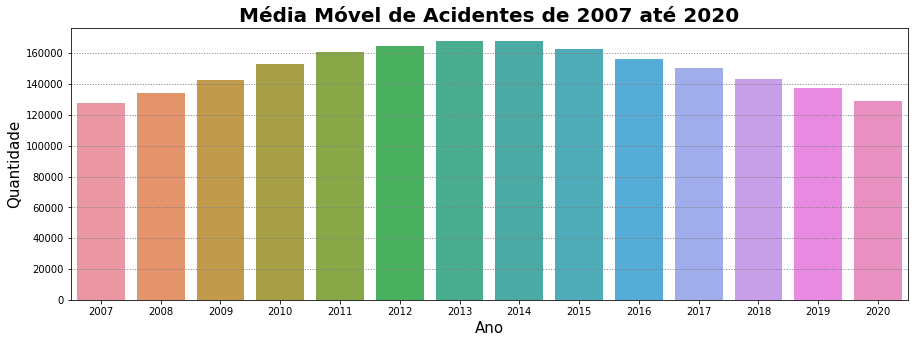

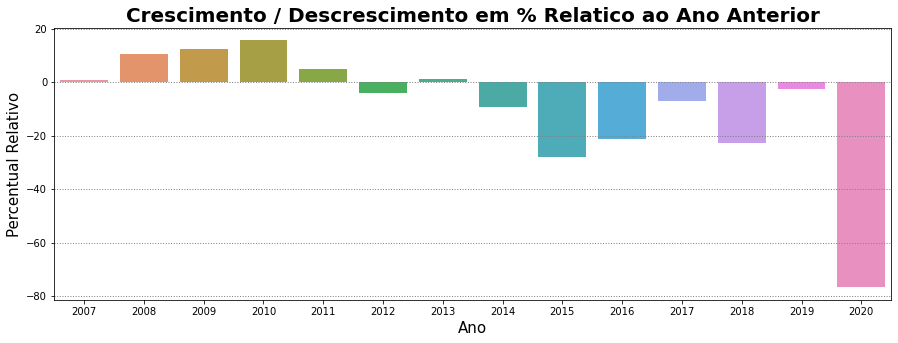

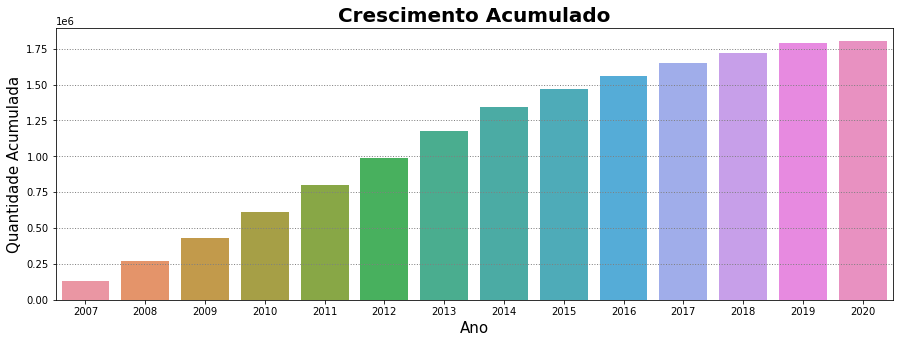

In [295]:
plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Média Móvel de Acidentes de 2007 até 2020',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Media_Movel")
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Crescimento / Descrescimento em % Relatico ao Ano Anterior',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Relativo_ano_anterior_(%)")
ax.set_ylabel("Percentual Relativo", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Crescimento Acumulado',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Acumulado")
ax.set_ylabel("Quantidade Acumulada", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

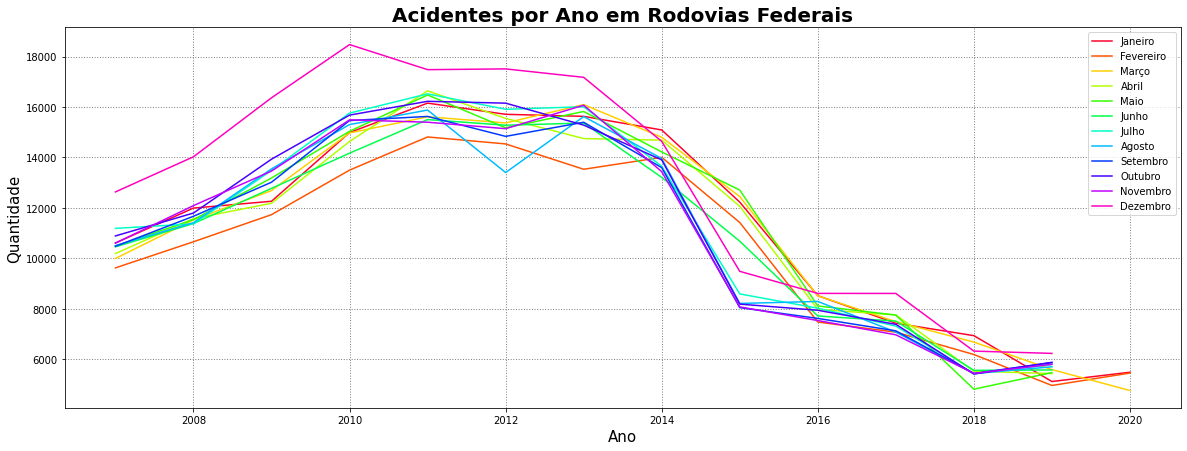

In [253]:
ax = dataset.groupby(["ano","mes"])[["id"]].count()
ax=ax.reset_index()

plt.figure(figsize=(20,7))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title('Acidentes por Ano em Rodovias Federais',fontweight='bold', fontsize=20)
ax = sns.lineplot(data=ax,x="ano",y="id", hue="mes", palette='gist_rainbow')
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
ax.legend(["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"])
plt.show()